<a href="https://colab.research.google.com/github/Binary-Digits/TensorFlows/blob/main/CIFAR_trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets, Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense
import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# dowload CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


In [3]:
# print the size of the dataaset
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)
print(train_labels[0])

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
[6]


In [4]:
# convert categorical data into one-hot encoding
num_classes = 10
train_labels_onehot = keras.utils.to_categorical(train_labels, num_classes)
test_labels_onehot = keras.utils.to_categorical(test_labels, num_classes)
train_labels_onehot[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

show the first 9 images

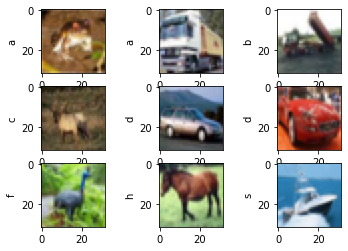

In [5]:
# create a image tag list
category_dict = {0:'airplane',
                 1:'automobile',
                 2:'bird',
                 3:'cat',
                 4:'deer',
                 5:'dog',
                 6:'frog',
                 7:'horse',
                 8:'ship',
                 9:'truck'}

# show the first 9 images with their labels
plt.figure()
for i in range(9):
  #create a figure with 9 subplots
  plt.subplot(3, 3, i+1)
  #show an image
  plt.imshow(train_images[i])
  #show the label
  plt.ylabel(category_dict[i][0])
plt.show()

In [6]:
# Pixel normalization
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

Model Creation

In [13]:
def CNN_classification_model(input_size=train_images.shape[1:]):
  model = Sequential()
  # the first block with 2 convolutional layers and 1 maxpooling layer
  #Conv1
  model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_size))
  #relu activation function
  model.add(Activation('relu'))
  #Conv2
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  #maxpooling
  model.add(MaxPooling2D(pool_size=(2, 2), strides=1))

  # the second block
  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  #maxpooling the default strides = 1
  model.add(MaxPooling2D(pool_size=(2, 2), strides=1))

  # before sending a feature map into a fully connected network, it should be 
  #flattenned into a column vector
  model.add(Flatten())
  #fully connected layer
  model.add(Dense(128))
  model.add(Activation('relu'))
  # dropout layer. every neurons set to 0 to with a probability of 0.25
  model.add(Dropout(0.25))
  model.add(Dense(num_classes))
  #map the score of each class into probability
  model.add(Activation('softmax'))

  opt = keras.optimizers.Adam(lr=0.0001)

  model.compile(loss= 'sparse_categorical_crossentropy', optimizer=opt,
                metrics=['accuracy'])
  return model
model = CNN_classification_model()
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_12 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_13 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 29, 29, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 29, 29, 64)        18496     
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model Training

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint
model_name = 'final_cifar10.h5'
model_checkpoint = ModelCheckpoint(model_name, monitor='loss', verbose=1, save_best_only=True)

# load pretrained models
trained_weights_path = 'cifar10_weights.h5'
if os.path.exists(trained_weights_path):
  model.load_weights(trained_weights_path, by_name=True)

# train
model.fit(train_images, train_labels, batch_size=32, epochs=10, callbacks=[model_checkpoint],verbose=1)



Epoch 1/10
1563/1563 [==============================] - ETA: 0s - loss: 1.6111 - accuracy: 0.4127
Epoch 1: loss improved from inf to 1.61113, saving model to final_cifar10.h5
1563/1563 [==============================] - 581s 371ms/step - loss: 1.6111 - accuracy: 0.4127
Epoch 2/10
1563/1563 [==============================] - ETA: 0s - loss: 1.3043 - accuracy: 0.5358
Epoch 2: loss improved from 1.61113 to 1.30432, saving model to final_cifar10.h5
1563/1563 [==============================] - 576s 369ms/step - loss: 1.3043 - accuracy: 0.5358
Epoch 3/10
1563/1563 [==============================] - ETA: 0s - loss: 1.1564 - accuracy: 0.5944
Epoch 3: loss improved from 1.30432 to 1.15645, saving model to final_cifar10.h5
1563/1563 [==============================] - 572s 366ms/step - loss: 1.1564 - accuracy: 0.5944
Epoch 4/10
1563/1563 [==============================] - ETA: 0s - loss: 1.0496 - accuracy: 0.6323
Epoch 4: loss improved from 1.15645 to 1.04961, saving model to final_cifar10.h5
156

Model Evaluation

In [15]:
new_model = CNN_classification_model()
new_model.load_weights('final_cifar10.h5')

model.evaluate(test_images, test_labels, verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


313/313 [==============================] - 29s 93ms/step - loss: 0.8450 - accuracy: 0.7076


[0.8449504971504211, 0.7075999975204468]

In [16]:
# output the possibility of each class
new_model.predict(test_images[0:1])

array([[1.5143089e-01, 6.8333182e-05, 8.9507680e-03, 7.5241601e-01,
        5.9535791e-04, 1.9966708e-02, 4.5775189e-03, 1.7641234e-03,
        5.9493508e-02, 7.3673757e-04]], dtype=float32)

In [27]:
# output the predicted label
# new_model.predict_classes() is depreciated so use the following
np.argmax(new_model.predict(test_images[0:1]), axis=-1)

array([3])

plot the first 4 images in the test set aand their corresponding predicted labels

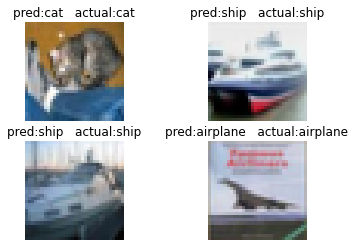

In [28]:
# label list
pred_list = []

plt.figure()
for i in range(0, 4):
  plt.subplot(2, 2, i+1)
  #plot
  plt.imshow(test_images[i])
  #predict
  pred = np.argmax(new_model.predict(test_images[0:10]), axis=-1)
  pred_list.append(pred)
  #display actual and predicted labels of images
  plt.title("pred:"+category_dict[pred[i]]+"   actual:"+category_dict[test_labels[i][0]])
  plt.axis('off')
plt.show()